This is how much space the figure will take up on letter paper


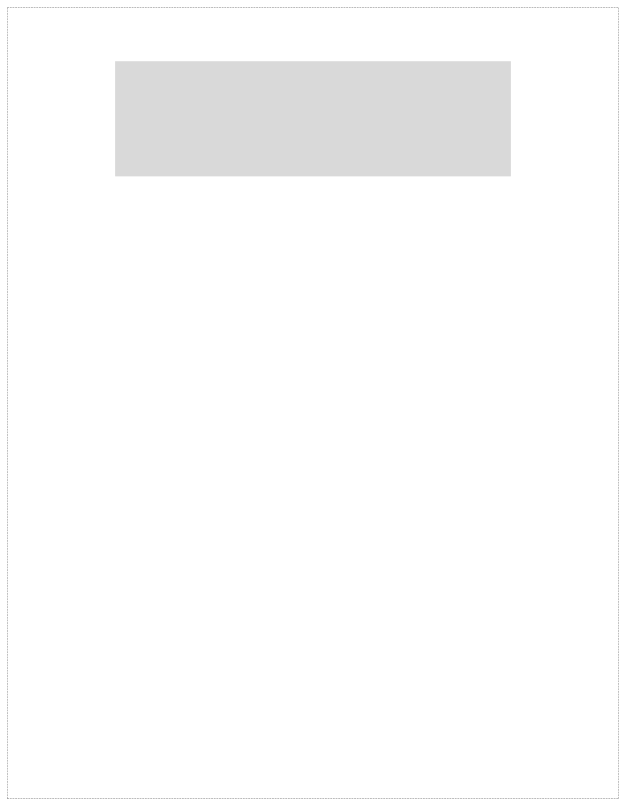

In [54]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [43]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim

from symfac.experimental import RBFExpansionV2

[0.17139, 0.0935, 0.05055, 0.0207, 0.00801, 0.00419, 0.00234, 0.0009, 0.0004]


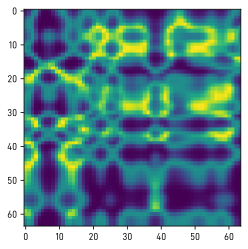

In [16]:
def rbf(X, Y):
    return np.exp(-np.subtract.outer(X, Y)**2)

np.random.seed(0)
n = 64
K = rbf(
    gaussian_filter1d(np.random.randn(n) * 3, 2.0),
    gaussian_filter1d(np.random.randn(n) * 3, 2.0)
) + rbf(
    gaussian_filter1d(np.random.randn(n) * 3, 2.0),
    gaussian_filter1d(np.random.randn(n) * 3, 2.0)
)
plt.imshow(K)

U, S, V = np.linalg.svd(K)
svd_K = []
for k in range(1, 10):
    truncation = (U[:, :k] * S[None, :k]) @ V[:k, :]
    svd_K.append(round(float(F.mse_loss(torch.tensor(truncation), torch.tensor(K))), 5))
print(svd_K)

In [4]:
# fac = RBFExpansionV2(k=1, batch_size=64)

# fac.fit(K.astype(np.float32))

In [12]:
Kt = torch.tensor(K, device="cuda", dtype=torch.float32)


0.00801322


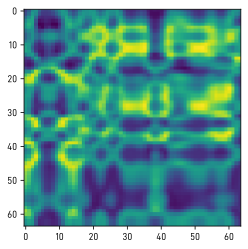

In [18]:
k=5
U, S, V = np.linalg.svd(K)
svd5 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd5)
print(round(float(F.mse_loss(svd5, Kt.cpu())), 8))

0.0505532


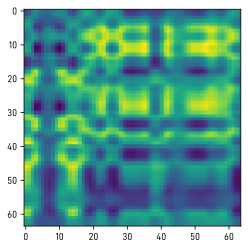

In [19]:
k=3
U, S, V = np.linalg.svd(K)
svd3 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd3)
print(round(float(F.mse_loss(svd3, Kt.cpu())), 8))

0.17138854


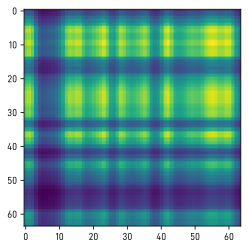

In [20]:
k=1
U, S, V = np.linalg.svd(K)
svd1 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd1)
print(round(float(F.mse_loss(svd1, Kt.cpu())), 8))

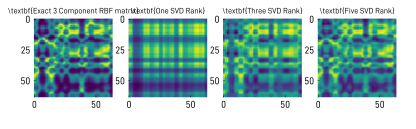

In [40]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

title_style = dict(
    fontsize=8,
    y=0.975,
    va='bottom'
)

axs[0].imshow(K)
axs[0].set_title(r'\textbf{Exact 3 Component RBF matrix}', **title_style)
axs[1].imshow(svd1)
axs[1].set_title(r'\textbf{One SVD Rank}', **title_style)
axs[2].imshow(svd3)
axs[2].set_title(r'\textbf{Three SVD Rank}', **title_style)
axs[3].imshow(svd5)
axs[3].set_title(r'\textbf{Five SVD Rank}', **title_style)



if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
plt.show()

In [6]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

make: 'fig-motivation.pdf' is up to date.


# Sandbox below

---

In [7]:
print(fac.report.loss_best.min())
best_run = np.argmin(fac.report.loss_best)
plt.imshow(fac.optimum(runs=best_run))

NameError: name 'fac' is not defined

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 4))
axs[0].imshow(svd1)
axs[1].imshow(svd2)
axs[2].imshow(K)
#axs[5].imshow(fac.result(runs=r, components=5))
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(24, 4))
axs[0].imshow(svd11)
axs[1].imshow(svd13)
axs[2].imshow(svd15)
axs[3].imshow(K1)
#axs[5].imshow(fac.result(runs=r, components=5))
plt.show()

In [44]:
def funk(u, v):
    return np.exp(-np.subtract.outer(u, v)**2)

In [88]:
n = 57
np.random.seed(0)
u = 5*np.random.randn(n)
v = 5*np.random.randn(n)
UU = gaussian_filter1d(u, 2., order=0)
w = 5*np.random.randn(n)
WW = gaussian_filter1d(w, 5., order=0)
VV = gaussian_filter1d(v, 2., order=0)

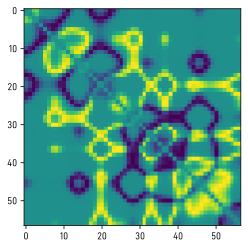

In [89]:
K1 = funk(np.array(UU), np.array(UU)) -  funk(np.array(VV), np.array(VV)) #- funk(np.array(WW), np.array(WW)) 
plt.imshow(K1)

In [90]:
Kt11 = torch.tensor(K1, device="cuda", dtype=torch.float32)


0.14329861


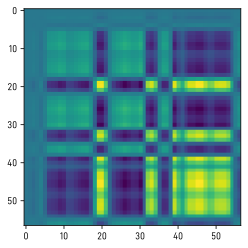

In [91]:
k=1
U, S, V = np.linalg.svd(K1)
svd11 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd11)
print(round(float(F.mse_loss(svd11, Kt11.cpu())), 8))

0.08320284


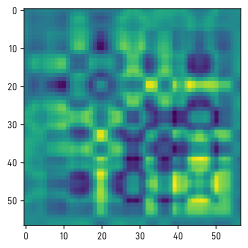

In [92]:
k=3
U, S, V = np.linalg.svd(K1)
svd13 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd13)
print(round(float(F.mse_loss(svd13, Kt11.cpu())), 8))

0.04786921


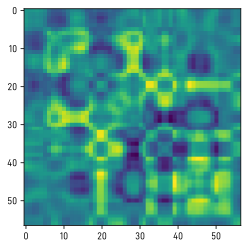

In [93]:
k=5
U, S, V = np.linalg.svd(K1)
svd15 = torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])
plt.imshow(svd15)
print(round(float(F.mse_loss(svd15, Kt11.cpu())), 8))

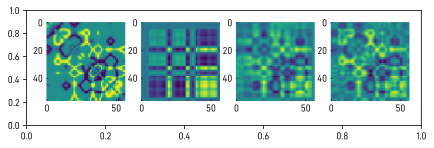

In [94]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

axs[0].imshow(K1)
axs[1].imshow(svd11)
axs[2].imshow(svd13)
axs[3].imshow(svd15)



if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
    
plt.show()

In [95]:
np.linalg.eigh(K1)

(array([-1.09051208e+01, -8.73667518e+00, -6.28281393e+00, -6.11968867e+00,
        -3.83662114e+00, -2.86333172e+00, -1.72794069e+00, -1.06239601e+00,
        -6.96527948e-01, -5.19815006e-01, -2.20469347e-01, -2.10101862e-01,
        -5.65978827e-02, -3.70939899e-02, -1.53630334e-02, -9.20147810e-03,
        -3.86715206e-03, -1.55204761e-03, -4.28885955e-04, -2.77643775e-04,
        -7.08228477e-05, -3.41741532e-05, -5.84744057e-06, -2.59631482e-06,
        -5.20762435e-07, -5.83820404e-08, -4.00385314e-09, -1.88265345e-09,
        -1.51898589e-10, -2.20069881e-11,  1.23358724e-10,  2.74725507e-09,
         2.35198783e-08,  3.34783172e-08,  1.97319180e-07,  1.07786287e-06,
         4.20285896e-06,  4.37198380e-05,  1.13555541e-04,  5.40905299e-04,
         1.41745970e-03,  3.57513689e-03,  7.33336124e-03,  1.74801890e-02,
         5.04989504e-02,  1.08533891e-01,  1.90863252e-01,  3.43146690e-01,
         4.80602881e-01,  8.99499670e-01,  1.46844187e+00,  1.96857084e+00,
         3.4

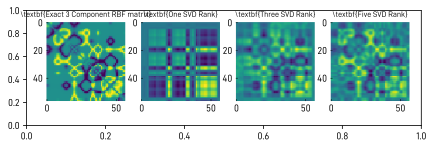

In [96]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

axs[0].imshow(K1)
axs[0].set_title(r'\textbf{Exact 3 Component RBF matrix}', **title_style)
axs[1].imshow(svd11)
axs[1].set_title(r'\textbf{One SVD Rank}', **title_style)
axs[2].imshow(svd13)
axs[2].set_title(r'\textbf{Three SVD Rank}', **title_style)
axs[3].imshow(svd15)
axs[3].set_title(r'\textbf{Five SVD Rank}', **title_style)




if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
plt.show()

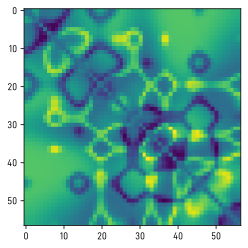

In [97]:
K2 = funk(np.array(UU), np.array(UU)) -  funk(np.array(VV), np.array(VV)) - funk(np.array(WW), np.array(WW)) 
plt.imshow(K2)

In [99]:
Kt2 = torch.tensor(K2, device="cuda", dtype=torch.float32)
U2, S2, V2 = np.linalg.svd(K2)

0.21887154


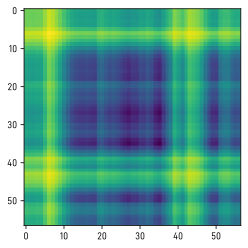

In [100]:
k=1
svd21 = torch.tensor((U2[:, :k] * S2[None, :k]) @ V2[:k, :])
plt.imshow(svd21)
print(round(float(F.mse_loss(svd21, Kt2.cpu())), 8))

0.11087204


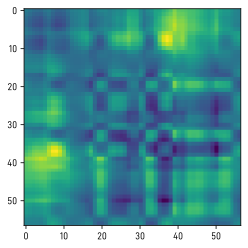

In [101]:
k=3
svd23 = torch.tensor((U2[:, :k] * S2[None, :k]) @ V2[:k, :])
plt.imshow(svd23)
print(round(float(F.mse_loss(svd23, Kt2.cpu())), 8))

0.05835983


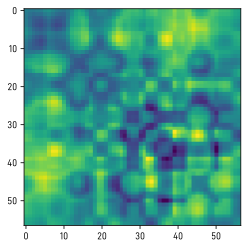

In [102]:
k=5
svd25 = torch.tensor((U2[:, :k] * S2[None, :k]) @ V2[:k, :])
plt.imshow(svd25)
print(round(float(F.mse_loss(svd25, Kt2.cpu())), 8))

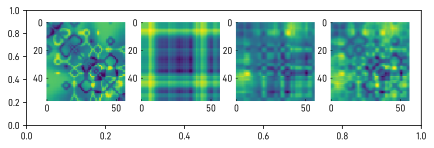

In [104]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

axs[0].imshow(K2)
axs[1].imshow(svd21)
axs[2].imshow(svd23)
axs[3].imshow(svd25)



if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
    
plt.show()

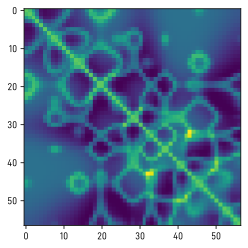

In [105]:
K3 = funk(np.array(UU), np.array(UU)) +  funk(np.array(VV), np.array(VV)) - funk(np.array(WW), np.array(WW)) 
plt.imshow(K3)

In [106]:
Kt3 = torch.tensor(K3, device="cuda", dtype=torch.float32)
U3, S3, V3 = np.linalg.svd(K3)

0.20512772


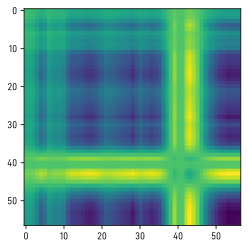

In [107]:
k=1
svd31 = torch.tensor((U3[:, :k] * S3[None, :k]) @ V3[:k, :])
plt.imshow(svd31)
print(round(float(F.mse_loss(svd31, Kt3.cpu())), 8))

0.11132599


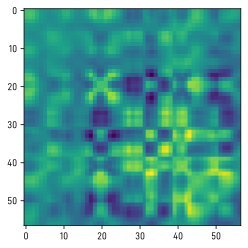

In [108]:
k=3
svd33 = torch.tensor((U3[:, :k] * S3[None, :k]) @ V3[:k, :])
plt.imshow(svd33)
print(round(float(F.mse_loss(svd33, Kt3.cpu())), 8))

0.05864835


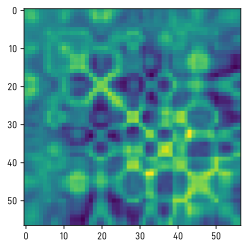

In [109]:
k=5
svd35 = torch.tensor((U3[:, :k] * S3[None, :k]) @ V3[:k, :])
plt.imshow(svd35)
print(round(float(F.mse_loss(svd35, Kt3.cpu())), 8))

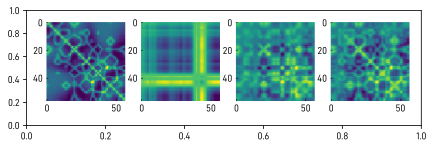

In [110]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

axs[0].imshow(K3)
axs[1].imshow(svd31)
axs[2].imshow(svd33)
axs[3].imshow(svd35)



if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
    
plt.show()